In [ ]:
import sys
from pathlib import Path
sys.path.append("../utils")
from IPython.display import Markdown, display

In [ ]:
# Clone YOLOv5 repo
if not Path('yolov5').exists():
    !git clone https://github.com/ultralytics/yolov5
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15921, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 15921 (delta 16), reused 24 (delta 9), pack-reused 15880
Receiving objects: 100% (15921/15921), 14.60 MiB | 6.97 MiB/s, done.
Resolving deltas: 100% (10915/10915), done.
/content/yolov5


In [ ]:
print("Convert PyTorch model to OpenVINO Model:")
command_export = f'{"python export.py --weights /content/fire.pt --imgsz 640 --batch-size 1 --include openvino"}'
display(Markdown(f"`{command_export}`"))
! $command_export

Convert PyTorch model to OpenVINO Model:


`python export.py --weights /content/fire.pt --imgsz 640 --batch-size 1 --include openvino`

export: data=data/coco128.yaml, weights=['/content/fire.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['openvino']
YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients

PyTorch: starting from /content/fire.pt with output shape (1, 25200, 8) (13.8 MB)

ONNX: starting export with onnx 1.14.0...
============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: export success ✅ 1.0s, saved as /content/fire.onnx (27.2 MB)

OpenVINO: starting export with openvino 2023.0.1-11005-fa1c41994f3-releases/2023/0...
OpenVINO: export su

In [ ]:
!python detect.py --weights /content/fire.pt --img-size 640 --source /content/fire1.jpg  --device cpu

detect: weights=['/content/fire.pt'], source=/content/fire1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: Ultralytics requirement ['gitpython>=3.1.30'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 62.1 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 5.7s, installed 1 package: ['gitpython>=3.1.30']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 701821

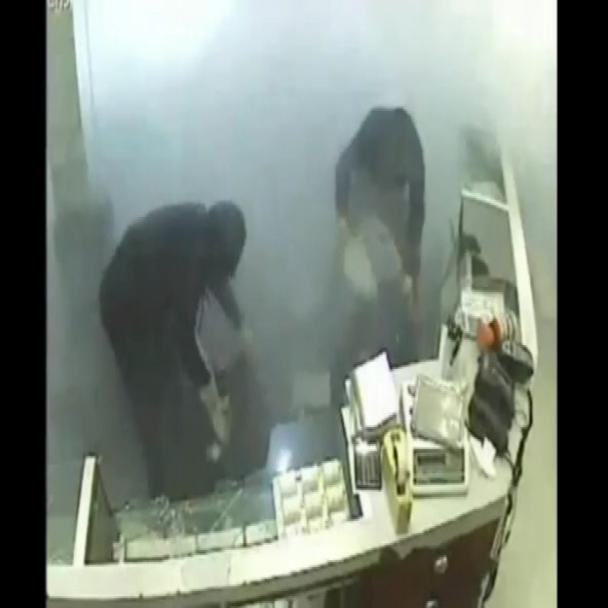

In [ ]:
from PIL import Image
# visualize prediction result
Image.open('/content/fire1.jpg')

In [ ]:
!python export.py --weights /content/fire.pt --include openvino

export: data=data/coco128.yaml, weights=['/content/fire.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['openvino']
YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients

PyTorch: starting from /content/fire.pt with output shape (1, 25200, 8) (13.8 MB)

ONNX: starting export with onnx 1.14.0...
============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: export success ✅ 1.4s, saved as /content/fire.onnx (27.2 MB)

OpenVINO: starting export with openvino 2023.0.1-11005-fa1c41994f3-releases/2023/0...
OpenVINO: expo

In [ ]:
!python detect.py --weights /content/fire_openvino_model --img-size 640 --source /content/fire1.jpg  --device cpu

detect: weights=['/content/fire_openvino_model'], source=/content/fire1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.0.1+cu118 CPU

Loading /content/fire_openvino_model for OpenVINO inference...
image 1/1 /content/fire1.jpg: 640x640 1 smoke, 236.4ms
Speed: 2.6ms pre-process, 236.4ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


In [ ]:
!python detect.py --weights /content/fire_openvino_model --img-size 640 --source /content/fire2.jpg  --device cpu

detect: weights=['/content/fire_openvino_model'], source=/content/fire2.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.0.1+cu118 CPU

Loading /content/fire_openvino_model for OpenVINO inference...
image 1/1 /content/fire2.jpg: 640x640 1 smoke, 252.9ms
Speed: 2.6ms pre-process, 252.9ms inference, 2.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


In [ ]:
!python detect.py --weights /content/fire_openvino_model --img-size 640 --source /content/fire3.jpg  --device cpu

detect: weights=['/content/fire_openvino_model'], source=/content/fire3.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.0.1+cu118 CPU

Loading /content/fire_openvino_model for OpenVINO inference...
image 1/1 /content/fire3.jpg: 640x640 1 smoke, 417.1ms
Speed: 3.1ms pre-process, 417.1ms inference, 2.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


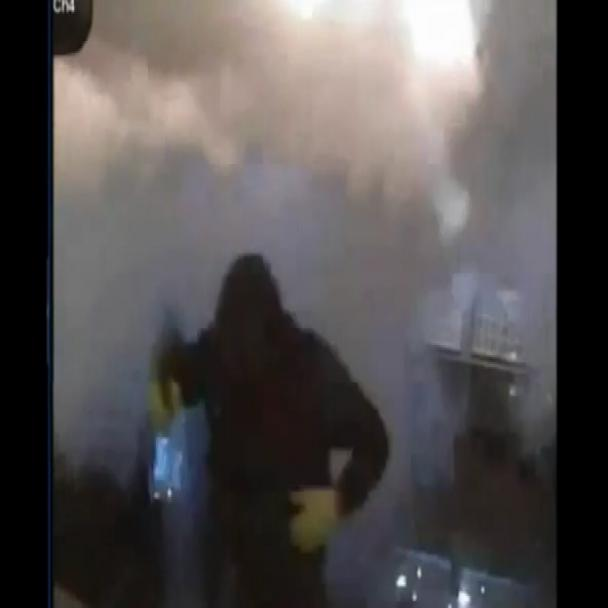

In [ ]:
from PIL import Image
# visualize prediction result
Image.open('/content/fire3.jpg')

In [ ]:
# Inference FP32 model (OpenVINO IR)
!benchmark_app -m /content/fire.onnx -d CPU -api async

[Step 1/11] Parsing and validating input arguments
[ INFO ] Parsing input parameters
[Step 2/11] Loading OpenVINO Runtime
[ INFO ] OpenVINO:
[ INFO ] Build ................................. 2023.0.1-11005-fa1c41994f3-releases/2023/0
[ INFO ] 
[ INFO ] Device info:
[ INFO ] CPU
[ INFO ] Build ................................. 2023.0.1-11005-fa1c41994f3-releases/2023/0
[ INFO ] 
[ INFO ] 
[Step 3/11] Setting device configuration
[ WARNING ] Performance hint was not explicitly specified in command line. Device(CPU) performance hint will be set to PerformanceMode.THROUGHPUT.
[Step 4/11] Reading model files
[ INFO ] Loading model files
[ INFO ] Read model took 53.38 ms
[ INFO ] Original model I/O parameters:
[ INFO ] Model inputs:
[ INFO ]     images (node: images) : f32 / [...] / [1,3,640,640]
[ INFO ] Model outputs:
[ INFO ]     output0 (node: output0) : f32 / [...] / [1,25200,8]
[Step 5/11] Resizing model to match image sizes and given batch
[ INFO ] Model batch size: 1
[Step 6/11] Confi

In [ ]:
# Inference INT8 model (OpenVINO IR)
!benchmark_app -m /content/fire_openvino_model/fire.xml -d CPU -api async

[Step 1/11] Parsing and validating input arguments
[ INFO ] Parsing input parameters
[Step 2/11] Loading OpenVINO Runtime
[ INFO ] OpenVINO:
[ INFO ] Build ................................. 2023.0.1-11005-fa1c41994f3-releases/2023/0
[ INFO ] 
[ INFO ] Device info:
[ INFO ] CPU
[ INFO ] Build ................................. 2023.0.1-11005-fa1c41994f3-releases/2023/0
[ INFO ] 
[ INFO ] 
[Step 3/11] Setting device configuration
[ WARNING ] Performance hint was not explicitly specified in command line. Device(CPU) performance hint will be set to PerformanceMode.THROUGHPUT.
[Step 4/11] Reading model files
[ INFO ] Loading model files
[ INFO ] Read model took 14.22 ms
[ INFO ] Original model I/O parameters:
[ INFO ] Model inputs:
[ INFO ]     images (node: images) : f32 / [...] / [1,3,640,640]
[ INFO ] Model outputs:
[ INFO ]     output0 (node: output0) : f32 / [...] / [1,25200,8]
[Step 5/11] Resizing model to match image sizes and given batch
[ INFO ] Model batch size: 1
[Step 6/11] Confi